# Zonally average surface current rotary spectra

Rotary spectra need to have been computed and stored

In [1]:
import os, sys
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
from mitequinox.sigp import *
from mitequinox.plot import *

In [2]:
from dask_jobqueue import PBSCluster
# for heavy processing:
#cluster = PBSCluster(cores=6, processes=6, walltime='12:00:00')
#w = cluster.scale(6*40)
# for zonal averaging post processing:
cluster = PBSCluster(cores=12, processes=12, walltime='01:00:00')
#w = cluster.scale(30*12)
w = cluster.scale(3*12)

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/distributed/deploy/local.py:138: UserWarning: diagnostics_port has been deprecated. Please use `dashboard_address=` instead
  "diagnostics_port has been deprecated. "


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
cluster

---
## load rotary spectra


In [9]:
faces = [1, 2, 10, 11]

grd = load_grd().drop(['hFacC','hFacW','hFacS','rAw','rAs','rAz','dxC','dxG','dyC','dyG'])
dij=4
grd = grd.isel(i=slice(None,None,dij), j=slice(None,None,dij),
               i_g=slice(None,None,dij), j_g=slice(None,None,dij))

v='SSUV'
# faces: 1 2 10 11
# concatenates faces
ds = xr.concat([xr.open_zarr(work_data_dir+'spectra/%s_f%02d.zarr'%(v,face)) 
                for face in faces], 
                 dim='face', compat='identical')
# or load concatenated spectra
#ds = xr.open_zarr(work_data_dir+'spectra/%s.zarr'%(v)) #.isel(face=slice(0,2))
#ds = ds.drop(['XC','YC'])

#ds = ds.assign_coords(**grd.sel(face=faces).variables)
ds = ds.assign_coords(rA=grd.rA)

ds = ds.rename({'XC':'lon','YC':'lat'})

ds = ds.chunk({'i': 72, 'j':24})

# reset mask
ds['mask'] = (ds.Depth*0.+1.).where( ds.mask, other=0. )

print(ds)
print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:    (face: 4, freq_time: 1440, i: 1080, j: 1080)
Coordinates:
  * freq_time  (freq_time) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * i          (i) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
  * j          (j) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
    Depth      (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
    lon        (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
    lat        (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
  * face       (face) int64 1 2 10 11
    mask       (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
    CS         (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
    SN         (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1, 24, 72)>
    rA         (face, j, i) float32 dask.array<shape=(4, 1080, 1080), chunksize=(1,

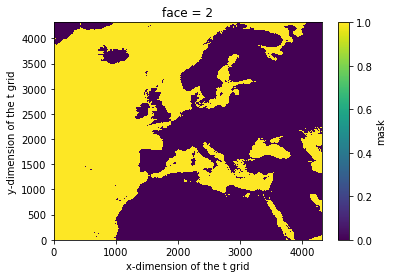

In [6]:
ds.mask.sel(face=2).plot()

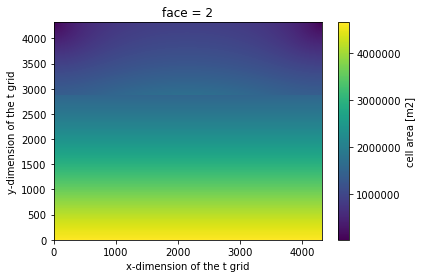

In [7]:
ds.rA.sel(face=2).plot()

---

## compute the zonal average

Inspired from [Ryan's notebook](https://gist.github.com/rabernat/fd2522f1937a43f49ac0423d35915648)

Does not work for all faces

In [6]:
#ds = ds.persist()

In [8]:
#del ds

In [16]:
#del ds_stacked

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [8]:
#ds.stack(points=['face', 'j', 'i'])

In [15]:
ds = ds.stack(points=['i','j','face']).chunk({'points':4320*4}).persist()
#.persist()
print(ds)

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

<xarray.Dataset>
Dimensions:    (freq_time: 1440, points: 4665600)
Coordinates:
  * freq_time  (freq_time) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
    Depth      (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    lon        (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    lat        (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    mask       (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    CS         (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    SN         (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
    rA         (points) float32 dask.array<shape=(4665600,), chunksize=(17280,)>
  * points     (points) MultiIndex
  - i          (points) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  - j          (points) int64 0 0 0 0 4 4 4 4 8 8 ... 20 20 20 24 24 24 24 28 28
  - face       (points) int64 1 2 10 11 1 2 10 11 1 2 ... 2 10 11 1 2 10 11 1 2


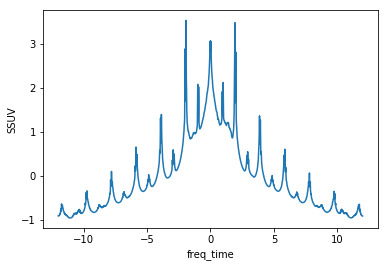

In [17]:
np.log10(ds_stacked.SSUV.mean('points')*1e4).plot()

In [18]:
#ds_stacked = ds.stack(points=['face', 'j', 'i']).persist()
#ds_stacked = ds.stack(points=['i','j','face']).persist()
#print(ds_stacked)

In [10]:
ds = ds.assign_coords(mask_depth = ds.mask.where(ds.Depth>500) )
#
bounds = {'lon': [-97, 41],'lat':[7, 62]}
ds = ds.assign_coords(mask_depth_bounds = ds.mask_depth.where( (ds.lon>=bounds['lon'][0]) 
                                                         & (ds.lon<=bounds['lon'][1]) 
                                                         & (ds.lat>=bounds['lat'][0]) 
                                                         & (ds.lat<=bounds['lat'][1]) , 
                                                         other=0) )

In [ ]:
ds = ds.persist()

{'fig': <Figure size 1080x1080 with 2 Axes>,
 'ax': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2ab8494845c0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2ab846fce0b8>}

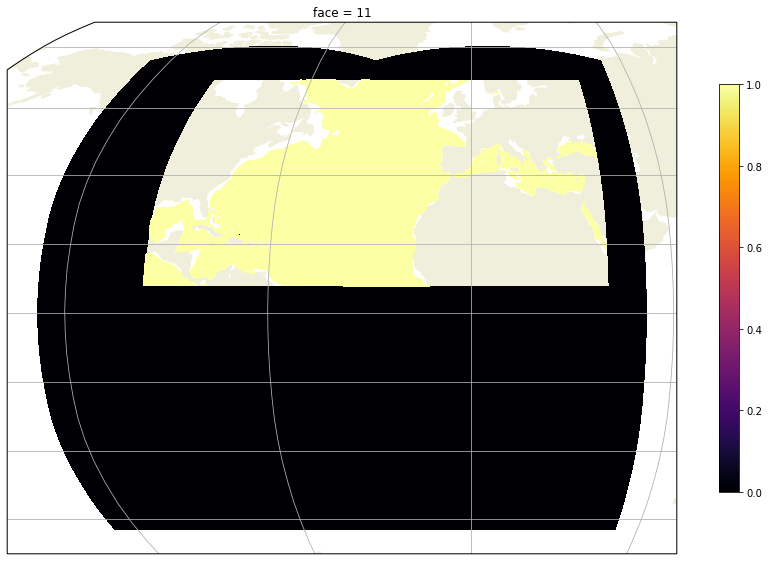

In [15]:
# plot mask
plot_pretty(ds.rename({'lon':'XC','lat':'YC'}).mask_depth_bounds, 
            vmin=0., vmax=1., cmap=plt.get_cmap('inferno'), 
            ignore_face=[6], colorbar=True, colorbar_kwargs={'shrink':.5})

---

### spatial average

involves stacking points

In [26]:
def mean_xy(v):
    return (v * v.rA*v.mask_depth_bounds).sum(dim=['points']) / (v.rA*v.mask_depth_bounds).sum()
#    return (v * v.rA*v.mask_depth_bounds).sum(dim=['points']) / (v.rA*v.mask_depth_bounds).sum()

In [27]:
# global average, ignore metrics
ds_out = ((ds.SSUV*ds.mask_depth_bounds).mean(dim=['points'], skipna=True)
            .rename('E_global_noA').to_dataset())
#ds_out = (ds.SSUV*ds.mask_depth_bounds).mean(dim=['points'], skipna=True).rename('E_global_noA').to_dataset()
ds_out['E_global'] = mean_xy(ds.SSUV).rename('E_global')

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


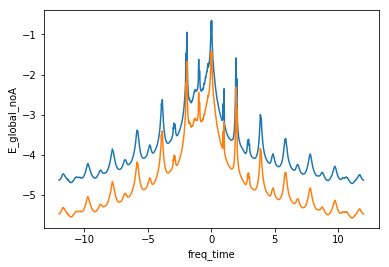

In [28]:
fig, ax = plt.subplots(1,1)
np.log10(ds_out.E_global).plot(ax=ax)
np.log10(ds_out.E_global_noA).plot(ax=ax)

In [ ]:
# zonal average
lat_bins = np.arange(0.,65.,1.)
latc = (lat_bins[1:]+lat_bins[:-1])*.5

def zonal_average(v):
    dA = v.rA*v.mask_depth_bounds
    out = (v*dA).groupby_bins(ds.lat,lat_bins).sum('points') \
            / dA.groupby_bins(ds.lat,lat_bins).sum('points')
    return out

ds_out['E_zav'] = zonal_average(ds.SSUV).rename('E_zav') #.assign_coords(lat_bins=latc)
ds_out = ds_out.assign_coords(lat_bins=latc)
ds_out = ds_out.chunk({'lat_bins':None})

In [36]:
ds_out

<xarray.Dataset>
Dimensions:       (freq_time: 1440, lat_bins: 64)
Coordinates:
  * freq_time     (freq_time) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 0.5 1.5 2.5 3.5 4.5 ... 60.5 61.5 62.5 63.5
Data variables:
    E_global_noA  (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_global      (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_zav         (freq_time, lat_bins) float64 dask.array<shape=(1440, 64), chunksize=(1440, 64)>

In [ ]:
ds_out = ds_out.persist()

In [ ]:
ds_out.to_zarr(work_data_dir+'spectra/E_UV_stats.zarr', mode='w')

In [8]:
ds_out = xr.open_zarr(work_data_dir+'spectra/E_UV_stats.zarr').persist()
ds_out

<xarray.Dataset>
Dimensions:       (freq_time: 1440, lat_bins: 64)
Coordinates:
  * freq_time     (freq_time) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 0.5 1.5 2.5 3.5 4.5 ... 60.5 61.5 62.5 63.5
Data variables:
    E_global      (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_global_noA  (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_zav         (freq_time, lat_bins) float64 dask.array<shape=(1440, 64), chunksize=(1440, 64)>

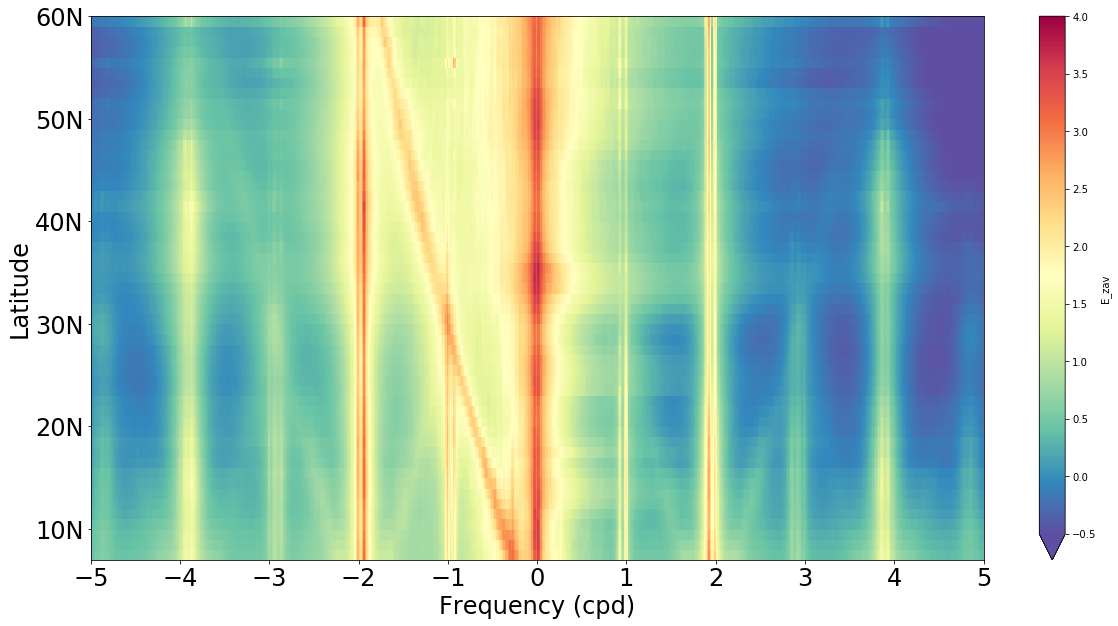

In [7]:
plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)

#np.log10(lE_zav*1e4).plot(x='freq_time', y='lat_bins', 
#cax = np.log10(ds_out.E_zav*1e4).plot(x='freq_time', y='lat_bins', 
#                                      add_colorbar=True,
#                                      vmin=-.5, vmax=4., 
#                                      cmap='Spectral_r', ax=ax)

cax = np.log10(ds_out.E_zav*1e4).plot(x='freq_time', y='lat_bins',
                                      vmin=-.5, vmax=4., 
                                      cmap='Spectral_r')
# colorbar
#cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
#cbar.ax.tick_params(labelsize=24)
#cbar.set_label('PSD ($log_{10} cm^2 s^{-2} cpd^{-1})$', fontsize=24)

# x,y ticks
#ax.set_xticks([-12., -10., -8., -6., -4., -2., 0, 2., 4., 6., 8., 10., 12.])
ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
#ax.set_xlim(-12., 12.)
ax.set_xlim(-5., 5.)
ax.set_ylim(7., 60.)
ax.set_yticks([10., 20., 30, 40., 50, 60.])
ax.set_yticklabels(['10N','20N','30N','40N','50N','60N'])
ax.set_ylabel('Latitude',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.get_cmap('RdYlBu_r'))
# x='freq_time', y='lat_bins', vmin=-.5,vmax=4.

---

In [ ]:
w = cluster.scale_up(30)

In [ ]:
client.restart()

In [16]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
